# Logistic Regression

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches  # For creating custom legend handles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    silhouette_score,
)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (
    KMeans,
    AgglomerativeClustering
)
import warnings

In [3]:
# Reading in the dataset
b_cancer = pd.read_csv("data.csv")

In [4]:
# Showing the first 5 rows of my dataset
b_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Shape of the dataframe
b_cancer.shape

(569, 33)

In [6]:
# Get basic information about the dataset, including non-null counts and data types
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Convert the 'diagnosis' column to binary: Malignant (M) = 1, Benign (B) = 0
b_cancer["diagnosis"] = b_cancer["diagnosis"].map({"M": 1, "B": 0})

In [8]:
# Using .iloc to exclude the last column by taking everything before this
b_cancer = b_cancer.iloc[:, :-1]

In [9]:
# Shape of the dataframe - Should now see 1 column less
b_cancer.shape

(569, 32)

In [10]:
# Check for missing values in each column
# print(b_cancer.isnull().sum())
print(f"Missing values per column before filling:\n{b_cancer.isnull().sum()}")

Missing values per column before filling:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [11]:
# Fill any missing values with the mean of each column
b_cancer.fillna(b_cancer.mean(), inplace=True)

In [12]:
# Showing the first 5 rows of my dataset with the new translation of Diagnosis column i.e. 1 or 0
b_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
print(b_cancer.describe())

                 id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min  

In [14]:
# Feature and Target Selection

# Cleaned dataset with diagnosis converted to 0 (Benign) and 1 (Malignant) 
# Drop ID and target columns
X = b_cancer.drop(["id", "diagnosis"], axis=1)
X = X.iloc[:, :10]
y = b_cancer["diagnosis"]

In [15]:
# Split the data into training and test sets purely for my feature selection
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Logistic Regression model on all features first
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

# Get the feature coefficients
coefficients = model.coef_[0]

# Create a DataFrame to organise feature names and their coefficients
feature_importance = pd.DataFrame({"feature": X.columns, "coefficient": coefficients})

# Sort by absolute value to find the most impactful features
top_features = feature_importance.reindex(
    feature_importance.coefficient.abs().sort_values(ascending=False).index
)

# Select the top 5 features
top_5_features = top_features.head(5)

print("Top 5 features impacting diagnosis based on Logistic Regression:")
print(top_5_features)

Top 5 features impacting diagnosis based on Logistic Regression:
               feature  coefficient
0          radius_mean    -2.398807
6       concavity_mean     1.266933
5     compactness_mean     0.716812
7  concave points_mean     0.678775
8        symmetry_mean     0.599250


In [16]:
# Selecting only the top 5 features from the DataFrame X
X = X[top_5_features["feature"]]

# Split the data into a 80 / 20 % split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Re-train the Logistic Regression model on the top 5 features
model = LogisticRegression(
    max_iter=100000
)  # Increase max_iter if needed for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

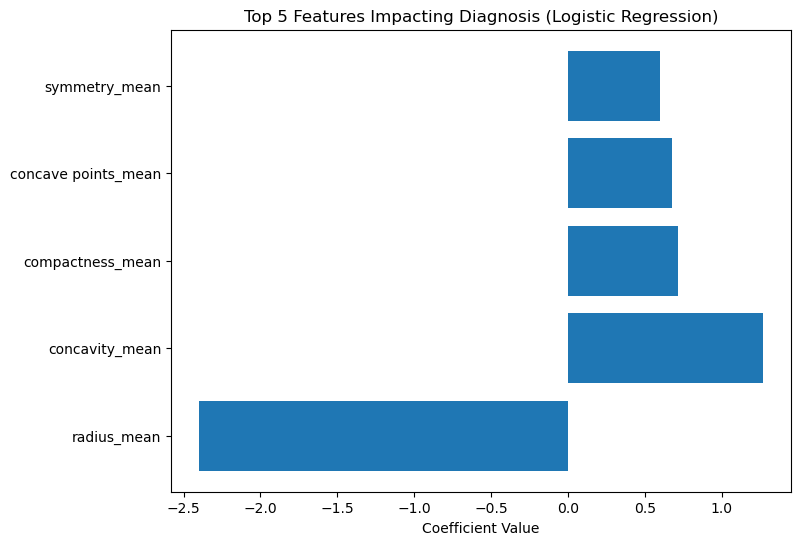

In [17]:
# Plot the coefficients on a simple bar chart
plt.figure(figsize=(8, 6))
plt.barh(top_5_features["feature"], top_5_features["coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Top 5 Features Impacting Diagnosis (Logistic Regression)")
plt.show()

In [18]:
# Make Predictions on the Test Data based on X_test
# Store that in a new variable y_pred
y_pred = model.predict(X_test)

In [19]:
# Evaluate the Models Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy}")

Accuracy of Logistic Regression Model: 0.9298245614035088


In [20]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        71
           1       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



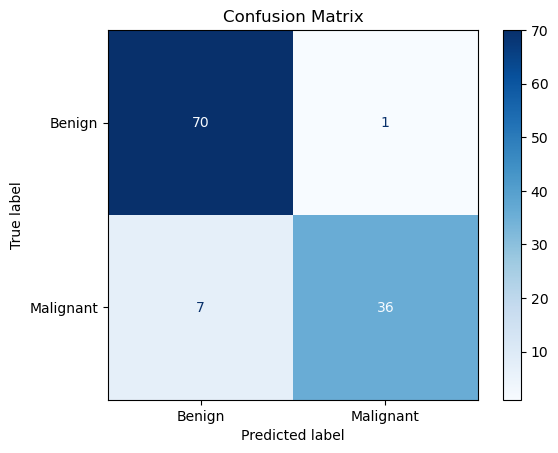

In [21]:
# Plot the Confusion Matrix for Visualisation
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malignant"]).plot(
    cmap="Blues"
)
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Mean accuracy of this classifier model
model.score(X_test, y_test)

0.9298245614035088

In [23]:
actual_labels = y_test  # Contains 0 and 1 as binary values
predicted_labels = y_pred  # Also contains 0 and 1 as binary values

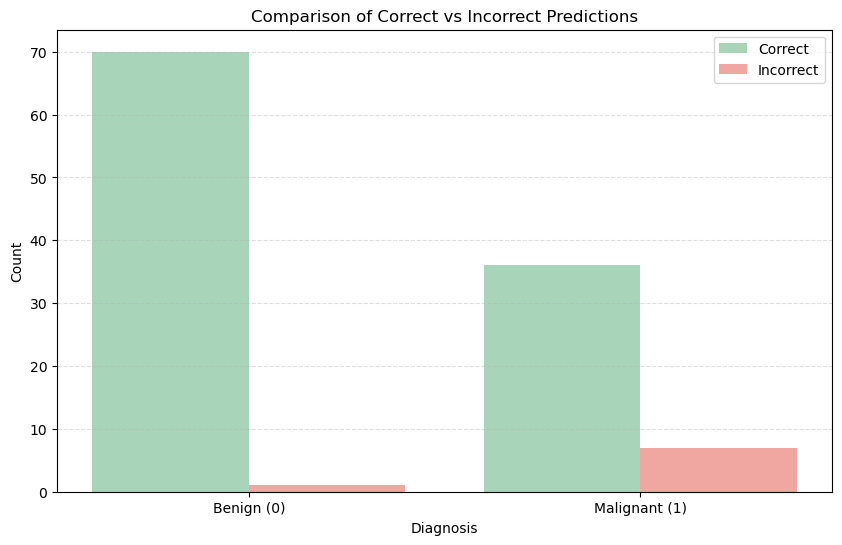

In [24]:
# Plotting a chart to show correct predictions vs. non correct

# Calculate the counts for correctly and incorrectly predicted classes
correct_benign = sum(
    [
        1 if actual == 0 and pred == 0 else 0
        for actual, pred in zip(actual_labels, predicted_labels)
    ]
)
incorrect_benign = sum(
    [
        1 if actual == 0 and pred == 1 else 0
        for actual, pred in zip(actual_labels, predicted_labels)
    ]
)
correct_malignant = sum(
    [
        1 if actual == 1 and pred == 1 else 0
        for actual, pred in zip(actual_labels, predicted_labels)
    ]
)
incorrect_malignant = sum(
    [
        1 if actual == 1 and pred == 0 else 0
        for actual, pred in zip(actual_labels, predicted_labels)
    ]
)

# Define the counts for the bar chart
correct = [correct_benign, correct_malignant]
incorrect = [incorrect_benign, incorrect_malignant]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for correct predictions (green)
bar1 = ax.bar(
    np.arange(len(correct)), correct, width=0.4, label="Correct", color="#A8D5BA"
)

# Plot for incorrect predictions (red)
bar2 = ax.bar(
    np.arange(len(incorrect)) + 0.4,
    incorrect,
    width=0.4,
    label="Incorrect",
    color="#F1A7A1",
)

# Adding labels and title
ax.set_xticks(np.arange(len(correct)) + 0.2)
ax.set_xticklabels(["Benign (0)", "Malignant (1)"])
ax.set_xlabel("Diagnosis")
ax.set_ylabel("Count")
ax.set_title("Comparison of Correct vs Incorrect Predictions")
ax.legend()
ax.grid(
    True, axis="y", linestyle="--", alpha=0.4
)  # Grid only on y-axis, with low opacity

# Show the plot
plt.show()

In [25]:
# Calculate the counts for correctly and incorrectly predicted classes
correct_predictions = sum(
    [1 if a == p else 0 for a, p in zip(actual_labels, predicted_labels)]
)
incorrect_predictions = len(actual_labels) - correct_predictions

print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")

Correct predictions: 106
Incorrect predictions: 8


---

# K-Fold Cross Validation

Cross-validation is a technique used to assess the performance and generalisability of a machine learning model. It divides the dataset into 𝑘-folds (here, 𝑘 = 5) and iteratively trains the model on 𝑘 − 1 folds while testing it on the remaining fold. This helps reduce overfitting and provides a more reliable estimate of model performance on unseen data.

In [26]:
# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(
    model, X, y, cv=5, scoring="accuracy"
)  # 'accuracy' scoring metric

# Display each fold's accuracy score and the average score
print("Cross-Validation Accuracy Scores for each fold:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores for each fold: [0.80701754 0.88596491 0.89473684 0.92982456 0.92035398]
Average Cross-Validation Accuracy: 0.8875795683900014


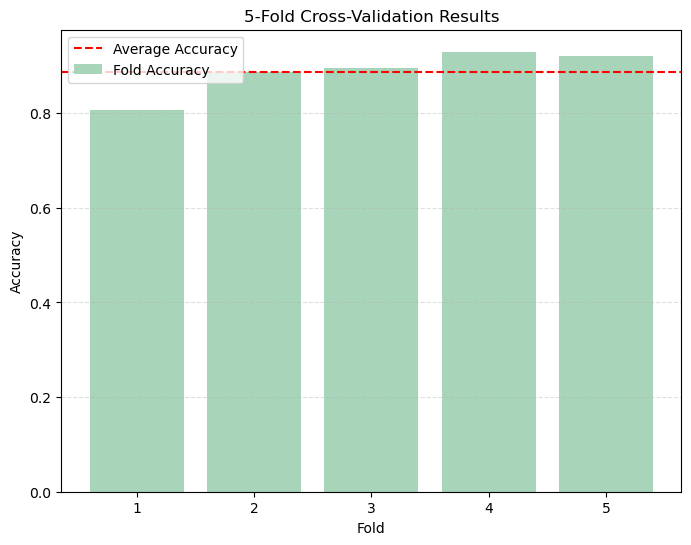

In [27]:
# Plotting the Cross-Validation accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores, color="#A8D5BA", label="Fold Accuracy")
plt.axhline(y=cv_scores.mean(), color="r", linestyle="--", label="Average Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("5-Fold Cross-Validation Results")
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.show()

---

# Support Vector Machines

#### SVM with Linear Kernel

In [28]:
# Initialise the SVM classifier with a linear kernel
svm_model_linear = SVC(kernel="linear", C=1.0, random_state=42)

# Fit the model on the training data
svm_model_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [29]:
# Predict on the test set
y_pred_svm = svm_model_linear.predict(X_test)

Accuracy of SVM Model with a linear kernel: 0.9298245614035088
Classification Report (SVM) Linear:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        71
           1       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



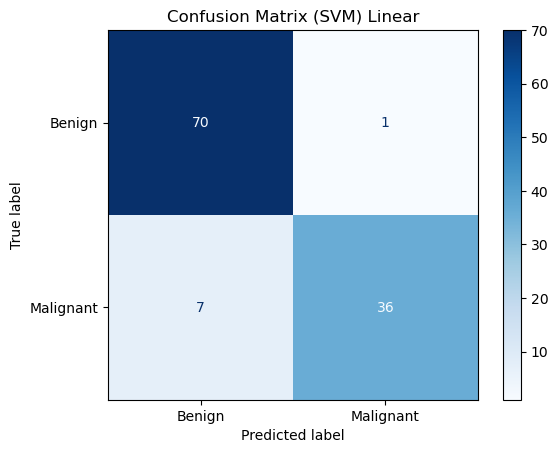

In [30]:
# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM Model with a linear kernel: {svm_accuracy}")

# Classification report
print("Classification Report (SVM) Linear:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(conf_matrix_svm, display_labels=["Benign", "Malignant"]).plot(
    cmap="Blues"
)
plt.title("Confusion Matrix (SVM) Linear")
plt.show()

#### SVM with RBF Kernel

In [31]:
# Initialise the SVM classifier with the RBF kernel
svm_model_rbf = SVC(kernel="rbf", C=1.0, random_state=42)

# Fit the model on the training data
svm_model_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [33]:
# Predict on the test set
y_pred_rbf = svm_model_rbf.predict(X_test)

Accuracy of SVM Model with RBF kernel: 0.9298245614035088
Classification Report (SVM) RBF:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        71
           1       1.00      0.81      0.90        43

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



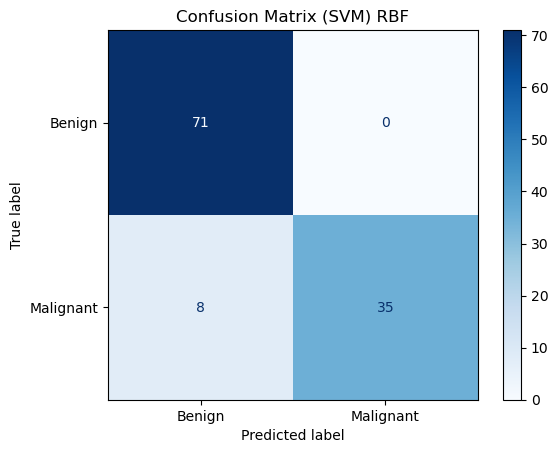

In [34]:
# Accuracy
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy of SVM Model with RBF kernel: {rbf_accuracy}")

# Classification report
print("Classification Report (SVM) RBF:")
print(classification_report(y_test, y_pred_rbf))

# Confusion Matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
ConfusionMatrixDisplay(conf_matrix_rbf, display_labels=["Benign", "Malignant"]).plot(
    cmap="Blues"
)
plt.title("Confusion Matrix (SVM) RBF")
plt.show()

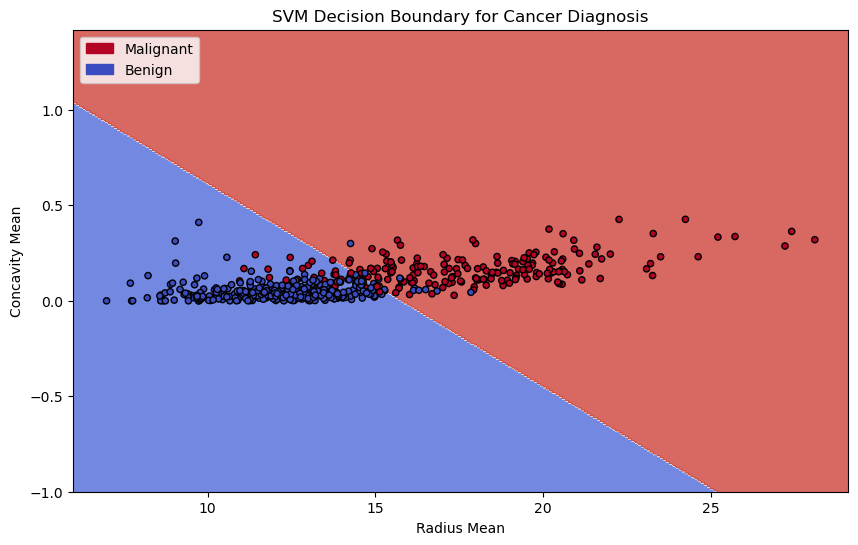

In [35]:
# Visualisation the decision boundary for entire dataset

# Use only two features for simplicity
feature_data = b_cancer[["radius_mean", "concavity_mean"]]  # Chosen features
target_labels = b_cancer["diagnosis"]  # Target labels (0 for Benign, 1 for Malignant)

# Initialise the SVM model with the Linear kernel
svm_classifier = SVC(kernel="linear", C=1.0, random_state=42)

# Train the SVM model on the entire dataset
svm_classifier.fit(feature_data, target_labels)

# Create a mesh grid for plotting the decision boundary
radius_min, radius_max = (
    feature_data.iloc[:, 0].min() - 1,
    feature_data.iloc[:, 0].max() + 1,
)
concavity_min, concavity_max = (
    feature_data.iloc[:, 1].min() - 1,
    feature_data.iloc[:, 1].max() + 1,
)
radius_range, concavity_range = np.meshgrid(
    np.arange(radius_min, radius_max, 0.01),
    np.arange(concavity_min, concavity_max, 0.01),
)

# Create a DataFrame with the same column names as the training data
grid_points = pd.DataFrame(
    np.c_[radius_range.ravel(), concavity_range.ravel()],
    columns=["radius_mean", "concavity_mean"],
)

# Reshape predictions to match the grid dimensions
predicted_labels = svm_classifier.predict(grid_points)
predicted_labels_grid = predicted_labels.reshape(radius_range.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(
    radius_range,
    concavity_range,
    predicted_labels_grid,
    alpha=0.8,
    cmap=plt.cm.coolwarm,
)
plt.scatter(
    feature_data.iloc[:, 0],
    feature_data.iloc[:, 1],
    c=target_labels,
    cmap=plt.cm.coolwarm,
    edgecolors="k",
    s=20,
)
plt.xlabel("Radius Mean")  # Replace with chosen feature names
plt.ylabel("Concavity Mean")  # Replace with chosen feature names
plt.title("SVM Decision Boundary for Cancer Diagnosis")

# Add a legend for Malignant and Benign
red_patch = mpatches.Patch(color=plt.cm.coolwarm(1.0), label="Malignant")
blue_patch = mpatches.Patch(color=plt.cm.coolwarm(0.0), label="Benign")
plt.legend(handles=[red_patch, blue_patch], loc="upper left")

plt.show()

---

# Further work look into GridSearchCV

GridSearchCV is used to search for the best combination of hyperparameters for a model.

C - Controls the trade-off between achieving a low error on the training set and minimising the model's complexity. Higher values of C penalize errors more, resulting in a stricter fit.

gamma - Defines how far the influence of a single training example reaches in non-linear kernels like RBF. Smaller values make the model more general; larger values focus on nearby points.

kernel - Specifies the type of hyperplane used to separate classes. Linear means a straight-line decision boundary, while rbf (Radial Basis Function) allows for more complex, curved boundaries.

In [43]:
# Define the model
svm = SVC()

# Define the parameter grid for GridSearchCV using a dictionary
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.1, 1],
    "kernel": ["linear", "rbf"],
}

# Initialise GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(
    estimator=svm, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Optionally, refit the model on the best parameters
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy: ", test_accuracy)

Best parameters found:  {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score:  0.9164835164835164
Test accuracy:  0.9210526315789473


---

# Clustering

In [44]:
# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster")

In [45]:
# Using 'X' as it contains the top 5 selected features from earlier in my code
X_clustering = X.drop(columns=["Actual Diagnosis"], errors="ignore")

In [46]:
# Creating an instance of the StandardScaler class
scaler = StandardScaler()

In [47]:
# Scale the features for K-Means
X_scaled = scaler.fit_transform(X_clustering)

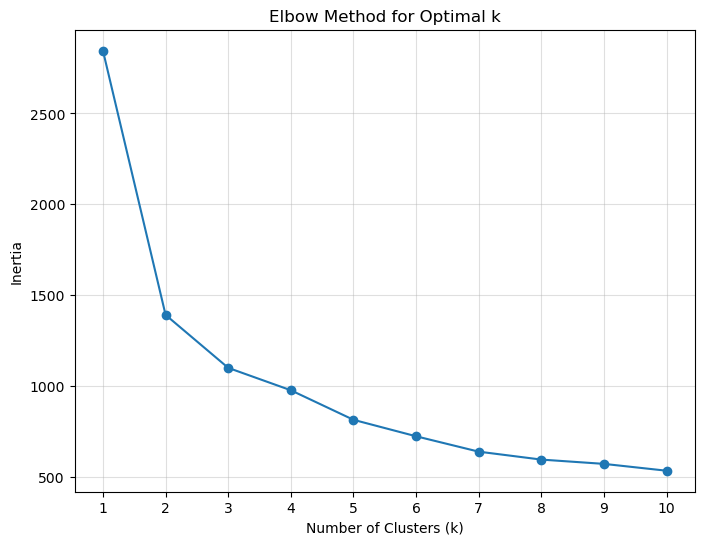

In [48]:
# Carrying out the Elbow Method and plotting

# Range of k values to test
k_values = range(1, 11)
inertia = []

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid(True, alpha=0.4)
plt.show()

In [49]:
# Apply K-Means clustering with 2 clusters (Benign/Malignant)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [56]:
# View what is in 'X', the original DataFrame before scaling
print(X.columns)

Index(['radius_mean', 'concavity_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'Cluster', 'Actual Diagnosis'],
      dtype='object')


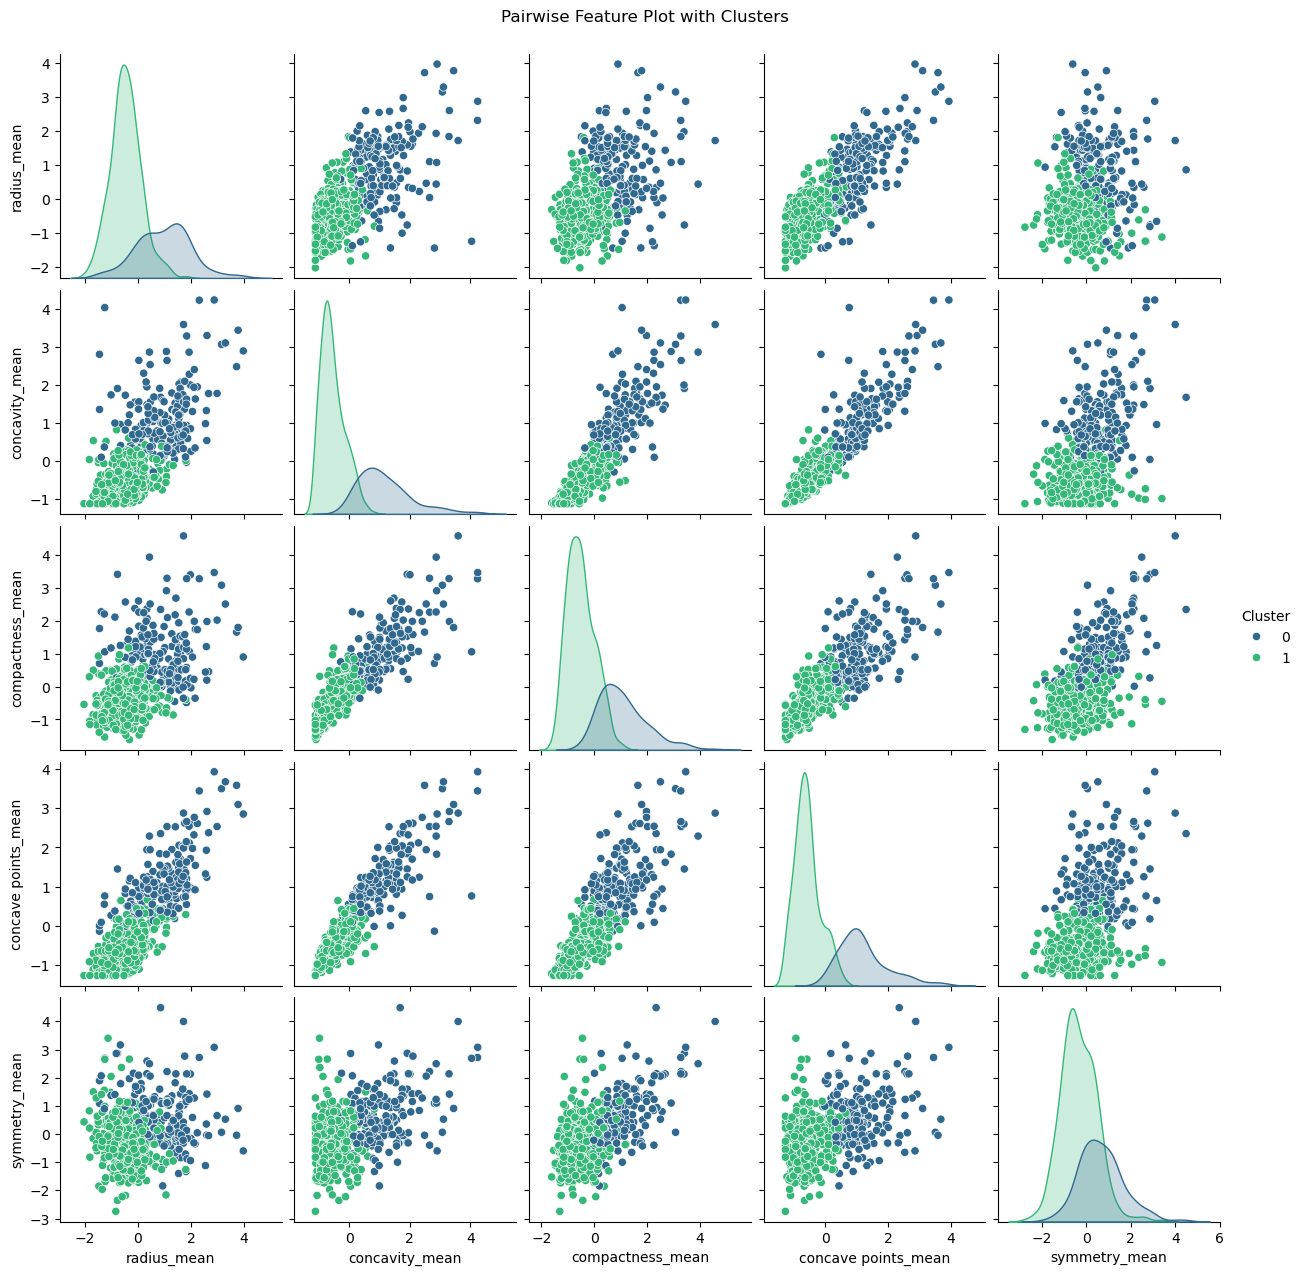

In [50]:
# Convert scaled features back to a DataFrame for pairplot visualisation
X_scaled_df = pd.DataFrame(X_scaled, columns=X_clustering.columns)

# Add cluster labels to the DataFrame
X_scaled_df["Cluster"] = clusters

# Now use sns.pairplot to plot all pairs of features, with clusters as the hue
sns.pairplot(X_scaled_df, hue="Cluster", palette="viridis")
plt.suptitle("Pairwise Feature Plot with Clusters", y=1.02)
plt.show()

In [51]:
# Add cluster labels to the original DataFrame
X["Cluster"] = clusters
X["Actual Diagnosis"] = y  # Add back the original labels for evaluation

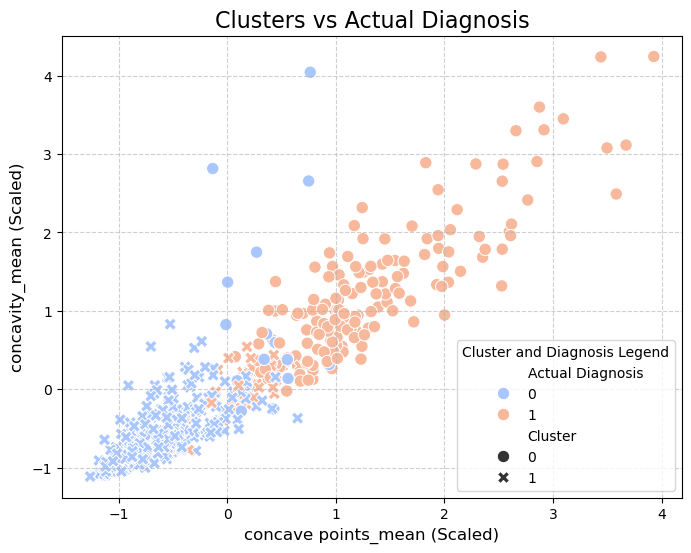

In [52]:
# Enhanced scatterplot for better visualisation
plt.figure(figsize=(8, 6))

# Scatterplot with cluster markers and actual diagnosis colors
sns.scatterplot(
    x=X_scaled[:, 3],  # First feature
    y=X_scaled[:, 1],  # Second feature
    hue=X["Actual Diagnosis"],  # Colour based on actual diagnosis
    style=X["Cluster"],  # Marker style based on cluster assignment
    palette="coolwarm",  # Colour palette for actual diagnosis
    markers=["o", "X"],  # Marker styles for clusters
    s=80,  # Marker size
)

# Adding titles and labels
plt.title("Clusters vs Actual Diagnosis", fontsize=16)
plt.xlabel(f"{X_scaled_df.columns[3]} (Scaled)", fontsize=12)
plt.ylabel(f"{X_scaled_df.columns[1]} (Scaled)", fontsize=12)

# Adjust legend
legend = plt.legend(title="Legend", loc="best", fontsize=8)
legend.get_texts()[0].set_text(
    "Actual Diagnosis:\n 0: Benign (Blue)\n 1: Malignant (Orange)"
)
legend.get_texts()[1].set_text("Clusters:\n 0: Circle\n 1: Cross")

# Adjust legend
legend = plt.legend(title="Cluster and Diagnosis Legend", loc="best", fontsize=10)

# Show the plot
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Silhouette Score

Here I am wanting to investigate whether or not two clusters (as suggested in the elbow method) is indeed a good fit. The silhouette score quantifies how well each point lies within its cluster compared to others. 

In [67]:
# Define range of clusters to test
n_clusters = np.arange(2,11)

# Iterate over cluster numbers and calculate silhouette score for my scaled data
for n in n_clusters:    
    agg_clust = AgglomerativeClustering(n_clusters=n, linkage='ward')    
    agg_clust.fit_predict(X_scaled_df)    
    sil_score = silhouette_score(X_scaled_df, agg_clust.labels_, metric='euclidean')    
    print(f'n_clusters = {n}, silhouette score = {sil_score}')

n_clusters = 2, silhouette score = 0.5021238845426597
n_clusters = 3, silhouette score = 0.4309064979972093
n_clusters = 4, silhouette score = 0.2657297459213077
n_clusters = 5, silhouette score = 0.256103751856692
n_clusters = 6, silhouette score = 0.2639508964405677
n_clusters = 7, silhouette score = 0.2554996815032147
n_clusters = 8, silhouette score = 0.21010605865134177
n_clusters = 9, silhouette score = 0.21270128645489245
n_clusters = 10, silhouette score = 0.19103156571395757


---

<i>Page 2</i>